In [26]:
#load the required libraries
import json
import numpy as np 
import pandas as pd



In [27]:
path='/Users/shaleenz/Desktop/MIT Prep /Python Lectures+Projects/archive (2)/yelp_academic_dataset_business.json'
df=pd.read_json(path,lines=True)


In [28]:

row_1=df.head(1)
row_1

business_id                 name       address     city state  \
0  6iYb2HFDywm3zjuRg0shjw  Oskar Blues Taproom  921 Pearl St  Boulder    CO   

  postal_code   latitude   longitude  stars  review_count  is_open  \
0       80302  40.017544 -105.283348    4.0            86        1   

                                          attributes  \
0  {'RestaurantsTableService': 'True', 'WiFi': 'u...   

                                          categories  \
0  Gastropubs, Food, Beer Gardens, Restaurants, B...   

                                               hours  
0  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...

In [29]:
# Attr=df['attributes'].apply(pd.Series)

In [30]:
df=pd.concat([df.drop(['attributes'], axis=1), df['attributes'].apply(pd.Series)], axis=1)

In [31]:
df.head(1)

business_id                 name       address     city state  \
0  6iYb2HFDywm3zjuRg0shjw  Oskar Blues Taproom  921 Pearl St  Boulder    CO   

  postal_code   latitude   longitude  stars  review_count  ...  BYOB  \
0       80302  40.017544 -105.283348    4.0            86  ...   NaN   

  CoatCheck Smoking DriveThru BYOBCorkage Corkage RestaurantsCounterService  \
0       NaN     NaN       NaN         NaN     NaN                       NaN   

  AgesAllowed DietaryRestrictions Open24Hours  
0         NaN                 NaN         NaN  

[1 rows x 52 columns]

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt



In [33]:
df.dtypes

business_id                    object
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
stars                         float64
review_count                    int64
is_open                         int64
categories                     object
hours                          object
RestaurantsTableService        object
WiFi                           object
BikeParking                    object
BusinessParking                object
BusinessAcceptsCreditCards     object
RestaurantsReservations        object
WheelchairAccessible           object
Caters                         object
OutdoorSeating                 object
RestaurantsGoodForGroups       object
HappyHour                      object
BusinessAcceptsBitcoin         object
RestaurantsPriceRange2         object
Ambience    

In [34]:


#all the categories

business_cats=df["categories"].str.cat(sep =", ")
business_cats

"Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries, Salad, Soup, Sandwiches, Delis, Restaurants, Cafes, Vegetarian, Antiques, Fashion, Used, Vintage & Consignment, Shopping, Furniture Stores, Home & Garden, Beauty & Spas, Hair Salons, Gyms, Active Life, Interval Training Gyms, Fitness & Instruction, Restaurants, Thai, Dentists, Health & Medical, Orthodontists, Breakfast & Brunch, Restaurants, Shopping, Jewelry Repair, Appraisal Services, Local Services, Jewelry, Engraving, Gold Buyers, Barbers, Beauty & Spas, Food, Shopping, Convenience Stores, Souvenir Shops, Wigs, Hair Extensions, Hair Salons, Blow Dry/Out Services, Hair Stylists, Beauty & Spas, Shopping, Food, Pizza, Restaurants, Restaurants, American (New), Bakeries, Desserts, Food, Cupcakes, Books, Mags, Music & Video, Musical Instruments & Teachers, Pawn Shops, Shopping, Videos & Video Game Rental, Jewelry, Oil Change Stations, Smog Check Stations, Automotive, Car Wash, Rest

In [35]:
#converting from string to list
def Convert(string):
    li = list(string.split(","))
    return li

In [36]:
business_cat_l=Convert(business_cats)

In [37]:
from collections import Counter
business_cat_l=dict(Counter(business_cat_l))
sort_categories = sorted(business_cat_l.items(), key=lambda x: x[1], reverse=True)
sort_categories_top=sort_categoreis

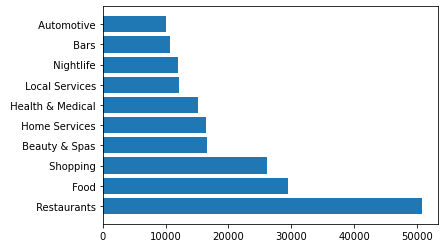

In [38]:
dat1 = dict(sort_categories[0:10])
names = list(dat1.keys())
values = list(dat1.values())

plt.barh(range(len(dat1)), values, tick_label=names)
plt.show()

In [84]:
df_cat = pd.DataFrame(sort_categories[0:5], columns=['Categories', 'Values']) 
df_cat['Percent']=df_cat['Values']/len(df['categories']) *100
df_cat.loc[len(df_cat.index)] = ['Others',24000, 15] 

df_cat

Categories  Values    Percent
0     Restaurants   50763  31.611296
1            Food   29469  18.351029
2        Shopping   26205  16.318461
3   Beauty & Spas   16574  10.321014
4   Home Services   16465  10.253137
5          Others   24000  15.000000

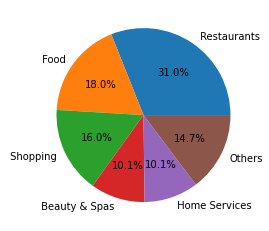

In [86]:
y = df_cat['Percent']
mylabels = df_cat['Categories']

plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

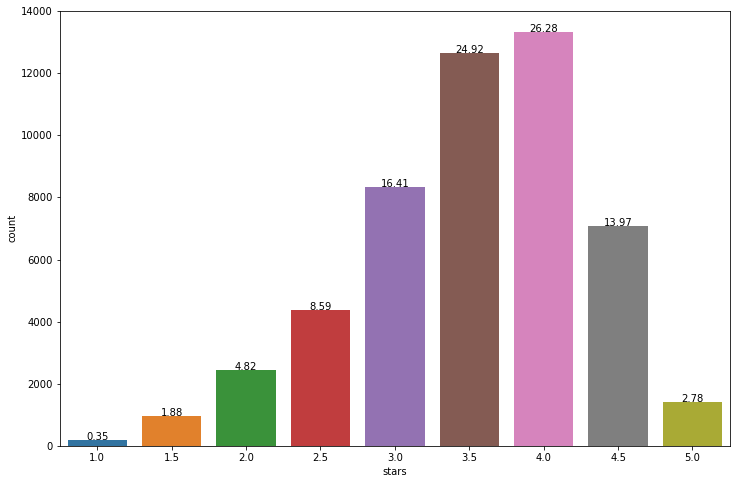

In [40]:
plt.figure(figsize=(12,8))

total = float(len(df_r['stars']) )

ax = sns.countplot(x=df_r['stars'], data= df_r['stars'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# 26.8 of restaurants had 4.0 ratings

<AxesSubplot:xlabel='Labels', ylabel='stars'>

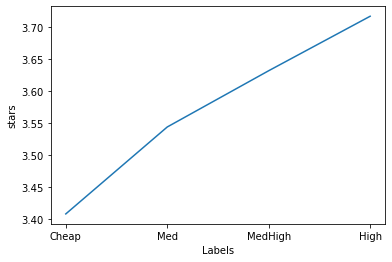

In [112]:
pricerange_stars=df_r.groupby("RestaurantsPriceRange2")["stars"].mean()
pricerange_stars=pd.DataFrame(pricerange_stars).reset_index()
pricerange_stars=pricerange_stars.drop([4])
pricerange_stars['Labels']=['Cheap','Med','MedHigh','High']
sns.lineplot(x=pricerange_stars['Labels'], y=pricerange_stars['stars'])


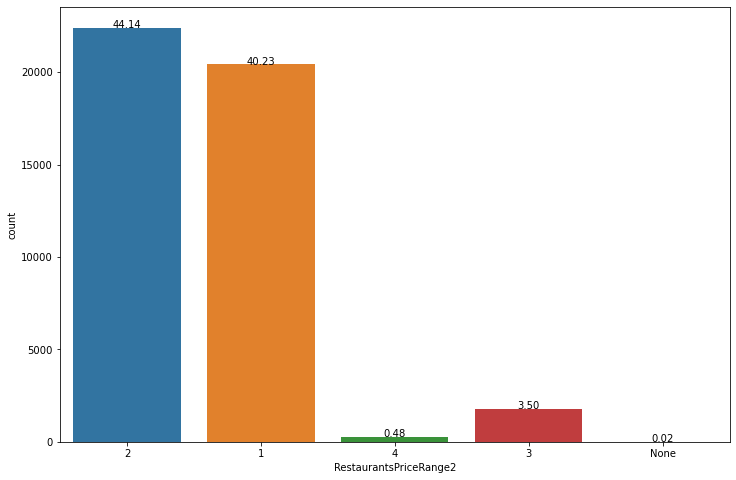

In [42]:
plt.figure(figsize=(12,8))
total = float(len(df_r['RestaurantsPriceRange2']) )

ax = sns.countplot(x=df_r['RestaurantsPriceRange2'], data= df_r['RestaurantsPriceRange2'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<AxesSubplot:>

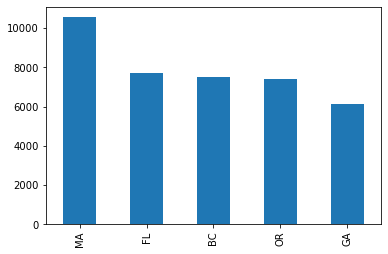

In [43]:
state=df_r['state'].value_counts()
state.head(5).plot(x='State',y='Count',kind='bar')


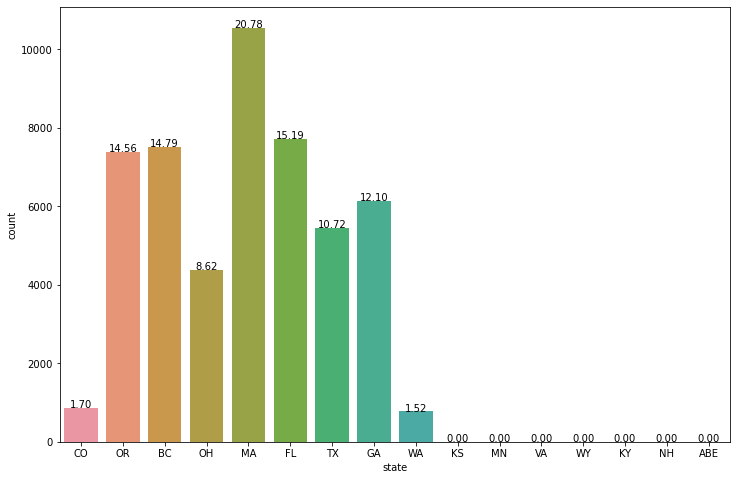

In [44]:
plt.figure(figsize=(12,8))
total = float(len(df_r['state']) )

ax = sns.countplot(x=df_r['state'], data= df_r['state'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [126]:
df.dtypes


business_id                    object
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
stars                         float64
review_count                    int64
is_open                         int64
categories                     object
hours                          object
RestaurantsTableService        object
WiFi                           object
BikeParking                    object
BusinessParking                object
BusinessAcceptsCreditCards     object
RestaurantsReservations        object
WheelchairAccessible           object
Caters                         object
OutdoorSeating                 object
RestaurantsGoodForGroups       object
HappyHour                      object
BusinessAcceptsBitcoin         object
RestaurantsPriceRange2         object
Ambience    

In [127]:
print(df['name'].isna().sum())
print(df['stars'].isna().sum())
print(df['state'].isna().sum())



0
0
0


In [121]:
len(df)

160585

In [46]:
name_counts=df_r.groupby("name")["review_count"].sum()

<AxesSubplot:xlabel='name'>

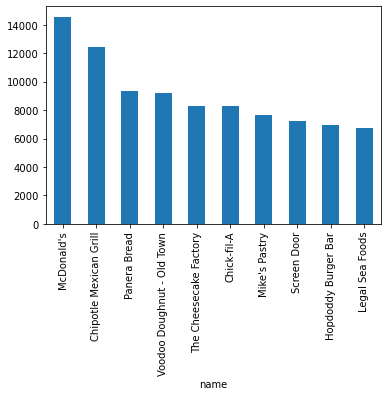

In [47]:
name_counts.sort_values(ascending=False).head(10).plot(x='Restaurants',y='ReviewCount',kind='bar')

In [48]:
import statistics 
from sklearn import preprocessing



In [49]:
statistics.mean(df['stars'])

3.6569542609832797

In [25]:
print('Hello World')

Hello World


In [ ]:
#STANDARDIZATION OF VARIABLES 

# df['standard_stars'] = df.apply(
#     lambda row: (row.stars- statistics.mean(df['stars']))/statistics.stdev(df['stars']),axis=1)
# df['standard_rev'] = df.apply(
#     lambda row: (row.review_count- statistics.mean(df['review_count']))/statistics.stdev(df['review_count']),axis=1)
# df['standard_final'] = df.apply(
#     lambda row: (row.standard_stars/row.standard_rev,axis=1)